# Heatmaps

In past sessions we've learned to read in Excel files, extract out data from tables, and then graph them. We also learned to use Git. This session we will plot differential expression transcriptomics data as heatmaps.

We will:
1) Pull the updated Git repository
2) Install the Seaborn Python package
3) Filter data for rows with Log2FC >3 or <-3.
4) Plot that data as a heatmap.

__Additional Concepts__:
- Relative paths
- Preventing file overwriting using timestamps

*Last edited: Isabella Casini 30.09.2025*

# 1) Pulling (updated Git repository)

1. Open up Git Bash
2. Use the command: "git pull origin main"
3. You should now have the new files (007_Heatmaps.ipynb and the /007_heatmap_data/)

# 2) Install Seaborn package

1. Open Anaconda Prompt
2. Activate your "biotech" environment
	- Hint: conda active biotech
3. Install "seaborn" using conda
	- Hint: conda install seaborn

# 3) Read in the transcriptomics data (comparing two strain to a reference strain)

(We'll use "Sheet4" and "Sheet5" - strains Marburg vs DeltaH and Z-245 vs DeltaH)

In [81]:
# import required libraries
import pandas as pd # call pandas "pd" for short (midline comment)
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt # import pyplot from matplotlib and call it "plt"
import matplotlib as mpl

# Plotting heatmaps
import seaborn as sns

# Related to file paths
import os

In [82]:
# Path to the file (change your path to where you save your file)
# pathin = r"C:\Users\uqicasin\Documents\Teaching\Program_Workshop\ProgrammingWorkshop_Git\ProgrammingWorkshop\007_heatmap_data\Data_S4.xlsx" # what we've used in the past

# Using relative path
pathin = os.path.join("007_heatmap_data", "Data_S4.xlsx") # to go back one directory, use ".."
print(os.path.abspath(pathin))

c:\Users\uqicasin\Documents\Teaching\Program_Workshop\ProgrammingWorkshop_Git\ProgrammingWorkshop\007_heatmap_data\Data_S4.xlsx


In [83]:
# Set the gene column to be the index
df_MvsDH = pd.read_excel(pathin, sheet_name='Sheet4', index_col=0)
df_ZvsDH = pd.read_excel(pathin, sheet_name='Sheet5', index_col=0)

In [84]:
df_ZvsDH

,baseMean,log2FoldChange,lfcSE,pvalue,padj,Reaction ID,Pathway,UP_DOWN,Gene Group,Unnamed: 10,KOG,COG,log2FoldChange.1,CV Ratio from DeSeq2 (%)
gene,,,,,,,,,,,,,,
ISG35_00005,442.150522,0.650108,0.196849,7.574904e-04,0.001487,NaN,NaN,UP,Gene_Group_1,NaN,NaN,R,0.650108,18.883169
ISG35_00020,215.014924,-0.518758,0.176249,2.787907e-03,0.005054,NaN,NaN,DOWN,Gene_Group_4,NaN,09109 Metabolism of terpenoids and polyketides,J,-0.518758,16.057329
ISG35_00025,1411.422971,-0.399212,0.117221,6.025344e-04,0.001190,NaN,NaN,DOWN,Gene_Group_5,NaN,09109 Metabolism of terpenoids and polyketides,J,-0.399212,11.236306
ISG35_00050,483.174466,0.704103,0.145347,9.654364e-07,0.000002,NaN,NaN,UP,Gene_Group_10,NaN,NaN,J,0.704103,13.539250
ISG35_00055,400.561972,0.448996,0.180597,1.150805e-02,0.019024,NaN,NaN,UP,Gene_Group_11,NaN,09145 Cellular community - prokaryotes,J,0.448996,17.182908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<20%,557.000000
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<10%,30.000000
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total,816.000000


In [85]:
# Remove rows with NaN as index in df_MvsDH
df_MvsDH = df_MvsDH[~df_MvsDH.index.isna()]

# Remove rows with NaN as index in df_ZvsDH
df_ZvsDH = df_ZvsDH[~df_ZvsDH.index.isna()]

In [86]:
df_ZvsDH

,baseMean,log2FoldChange,lfcSE,pvalue,padj,Reaction ID,Pathway,UP_DOWN,Gene Group,Unnamed: 10,KOG,COG,log2FoldChange.1,CV Ratio from DeSeq2 (%)
gene,,,,,,,,,,,,,,
ISG35_00005,442.150522,0.650108,0.196849,7.574904e-04,1.486553e-03,NaN,NaN,UP,Gene_Group_1,NaN,NaN,R,0.650108,18.883169
ISG35_00020,215.014924,-0.518758,0.176249,2.787907e-03,5.053584e-03,NaN,NaN,DOWN,Gene_Group_4,NaN,09109 Metabolism of terpenoids and polyketides,J,-0.518758,16.057329
ISG35_00025,1411.422971,-0.399212,0.117221,6.025344e-04,1.189935e-03,NaN,NaN,DOWN,Gene_Group_5,NaN,09109 Metabolism of terpenoids and polyketides,J,-0.399212,11.236306
ISG35_00050,483.174466,0.704103,0.145347,9.654364e-07,2.429038e-06,NaN,NaN,UP,Gene_Group_10,NaN,NaN,J,0.704103,13.539250
ISG35_00055,400.561972,0.448996,0.180597,1.150805e-02,1.902383e-02,NaN,NaN,UP,Gene_Group_11,NaN,09145 Cellular community - prokaryotes,J,0.448996,17.182908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ISG35_09180,433.186347,-0.651683,0.263997,1.035418e-02,1.727528e-02,FUM,"Citrate Cycle (TCA), Pyruvate Metabolism",DOWN,Gene_Group_1667,NaN,09101 Carbohydrate metabolism,C,-0.651683,25.918450
ISG35_09185,326.402147,-0.635617,0.280440,1.803100e-02,2.885877e-02,NaN,NaN,DOWN,Gene_Group_1668,NaN,NaN,R,-0.635617,27.535459
ISG35_09200,9054.806127,-3.204913,0.183235,1.749535e-69,4.315520e-68,AHSERL2,Amino Acids (Homoserine),DOWN,Gene_Group_1671,NaN,09105 Amino acid metabolism,J,-3.204913,17.844624


# 4) Filter out values from each that are Log2FC >3 or <-3

In [87]:
df_MvsDH_filtered = df_MvsDH[(df_MvsDH["log2FoldChange"] <= -3) | (df_MvsDH["log2FoldChange"] >= 3)]
df_ZvsDH_filtered = df_ZvsDH[(df_ZvsDH["log2FoldChange"] <= -3) | (df_ZvsDH["log2FoldChange"] >= 3)]

In [88]:
df_ZvsDH_filtered

,baseMean,log2FoldChange,lfcSE,pvalue,padj,Reaction ID,Pathway,UP_DOWN,Gene Group,Unnamed: 10,KOG,COG,log2FoldChange.1,CV Ratio from DeSeq2 (%)
gene,,,,,,,,,,,,,,
ISG35_00275,2008.560103,3.781940,0.127563,4.151278e-194,5.222308e-192,NaN,NaN,UP,Gene_Group_53,NaN,NaN,R,3.78194,11.634685
ISG35_00320,97.168366,-11.589866,3.202735,1.983069e-16,9.273979e-16,NaN,NaN,DOWN,Gene_Group_59,NaN,NaN,R,-11.589866,66.236721
ISG35_00325,25.683088,-9.418097,2.910358,5.551656e-13,2.175696e-12,NaN,NaN,DOWN,Gene_Group_60,NaN,NaN,O,-9.418097,46.866481
ISG35_00330,13.497534,-8.326926,2.769761,7.613524e-11,2.631267e-10,NaN,NaN,DOWN,Gene_Group_61,NaN,NaN,NaN,-8.326926,40.821807
ISG35_00335,133.851442,-12.190859,3.171203,3.799267e-24,2.555871e-23,NaN,NaN,DOWN,Gene_Group_62,NaN,NaN,S,-12.190859,18.947075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ISG35_08060,25.797241,6.218112,0.982622,2.411827e-10,8.009706e-10,NaN,NaN,UP,Gene_Group_1462,NaN,09109 Metabolism of terpenoids and polyketides,J,6.218112,25.111170
ISG35_08235,103.531059,3.593953,0.276074,2.475447e-39,2.965822e-38,NaN,NaN,UP,Gene_Group_1496,NaN,NaN,M,3.593953,16.114164
ISG35_08330,225.840369,3.090953,0.220199,1.012427e-45,1.431049e-44,FUM,"Citrate Cycle (TCA), Pyruvate Metabolism",UP,Gene_Group_1512,NaN,09101 Carbohydrate metabolism,C,3.090953,18.724322


# 5) Merge the two dataframes keeping only columns of interest

In [89]:
# select only the columns you want
columns_to_keep = ['log2FoldChange', 'padj', 'Gene Group']

# add a suffix to the columns to differentiate between the two dataframes
df_M_Z_vs_DH = pd.concat([df_MvsDH_filtered[columns_to_keep].add_suffix('_MvsDH'), df_ZvsDH_filtered[columns_to_keep].add_suffix('_ZvsDH')], axis=1)

In [90]:
df_M_Z_vs_DH

,log2FoldChange_MvsDH,padj_MvsDH,Gene Group_MvsDH,log2FoldChange_ZvsDH,padj_ZvsDH,Gene Group_ZvsDH
gene,,,,,,
ISG35_00010,-4.453175,5.019432e-246,Gene_Group_2,NaN,NaN,NaN
ISG35_00025,-4.276594,0.000000e+00,Gene_Group_5,NaN,NaN,NaN
ISG35_00050,-3.290761,1.593444e-86,Gene_Group_10,NaN,NaN,NaN
ISG35_00065,-4.091411,6.755209e-93,Gene_Group_13,NaN,NaN,NaN
ISG35_00080,-3.196203,1.585761e-74,Gene_Group_16,NaN,NaN,NaN
...,...,...,...,...,...,...
ISG35_08010,NaN,NaN,NaN,3.192546,3.423216e-24,Gene_Group_1452
ISG35_08045,NaN,NaN,NaN,-5.403369,2.696904e-26,Gene_Group_1459
ISG35_08050,NaN,NaN,NaN,-5.681042,1.257929e-43,Gene_Group_1460


In [91]:
# remove rows with NaN values in either log2FoldChange_MvsDH or log2FoldChange_ZvsDH
df_M_Z_vs_DH_filtered = df_M_Z_vs_DH[pd.notna(df_M_Z_vs_DH["log2FoldChange_MvsDH"]) & pd.notna(df_M_Z_vs_DH["log2FoldChange_ZvsDH"])]


In [92]:
df_M_Z_vs_DH_filtered

,log2FoldChange_MvsDH,padj_MvsDH,Gene Group_MvsDH,log2FoldChange_ZvsDH,padj_ZvsDH,Gene Group_ZvsDH
gene,,,,,,
ISG35_00325,3.275028,9.780739e-21,Gene_Group_60,-9.418097,2.175696e-12,Gene_Group_60
ISG35_00395,3.350190,1.866174e-27,Gene_Group_70,-7.881989,3.489820e-09,Gene_Group_70
ISG35_01365,6.226074,8.506095e-47,Gene_Group_250,6.570641,3.980696e-32,Gene_Group_250
ISG35_01465,3.943563,8.235176e-139,Gene_Group_264,-4.034839,3.102928e-16,Gene_Group_264
ISG35_01475,5.130032,2.272299e-33,Gene_Group_265,5.738887,2.560399e-37,Gene_Group_265
...,...,...,...,...,...,...
ISG35_08035,5.767421,1.515243e-11,Gene_Group_1457,4.526997,3.569633e-07,Gene_Group_1457
ISG35_08040,7.270368,6.795748e-18,Gene_Group_1458,4.485775,3.782621e-07,Gene_Group_1458
ISG35_08060,6.789363,3.995984e-12,Gene_Group_1462,6.218112,8.009706e-10,Gene_Group_1462


# 6) Plot the heatmap

In [93]:
# NEW define fonts (including size and color)
# Set global font and font size
mpl.rcParams['font.family'] = 'Arial'         # or 'DejaVu Sans', 'Times New Roman', etc.
mpl.rcParams['font.size'] = 10              # global font size

# Set global figure size (width, height) in inches
mpl.rcParams['figure.figsize'] = (8, 6)       # all figures will be 8x6 inches

mpl.rcParams['axes.titlesize'] = 10          # title font size
mpl.rcParams['axes.labelsize'] = 10          # axis label font size
mpl.rcParams['xtick.labelsize'] = 10          # x-axis tick font size
mpl.rcParams['ytick.labelsize'] = 10          # y-axis tick font size
mpl.rcParams['legend.fontsize'] = 10          # legend font size

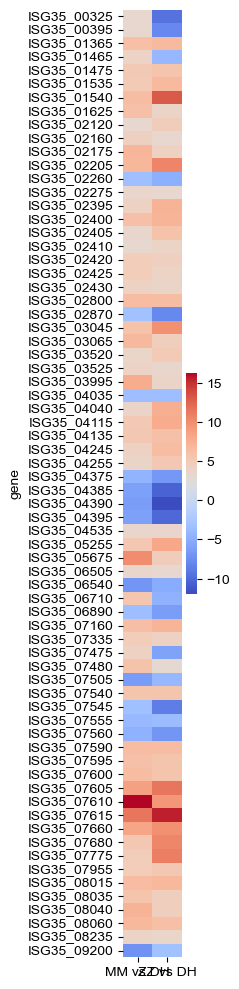

In [ ]:
## Default settings

# Set the figure size
plt.figure(figsize=(2.5, 10))  # slightly wider for readability

# Define discrete colors and levels
from matplotlib.colors import ListedColormap, BoundaryNorm

# Plot the heatmap
ax = sns.heatmap(
    df_M_Z_vs_DH_filtered[["log2FoldChange_MvsDH", "log2FoldChange_ZvsDH"]],
    xticklabels=["MM vs DH", "ZZ vs DH"],
    yticklabels=df_M_Z_vs_DH_filtered.index,
    cmap="coolwarm",
)

plt.tight_layout()

# Save the figure
pathout = r"C:\Users\uqicasin\Documents\Teaching\Program_Workshop\ProgrammingWorkshop_Git\ProgrammingWorkshop\007_heatmap_data"
filename = f"{pathout}\DE_Trans_simple.svg" # end of the file name

# # Alternative path out using relative paths
# filename = os.path.join("007_heatmap_data", "DE_Trans_simple.svg") # to go back one directory, use ".."
# print(os.path.abspath(filename))

# plt.savefig(filename, dpi=300, bbox_inches='tight') # uncomment to save the figure

plt.show()

c:\Users\uqicasin\Documents\Teaching\Program_Workshop\ProgrammingWorkshop_Git\ProgrammingWorkshop\007_heatmap_data\DE_Trans_discrete.svg


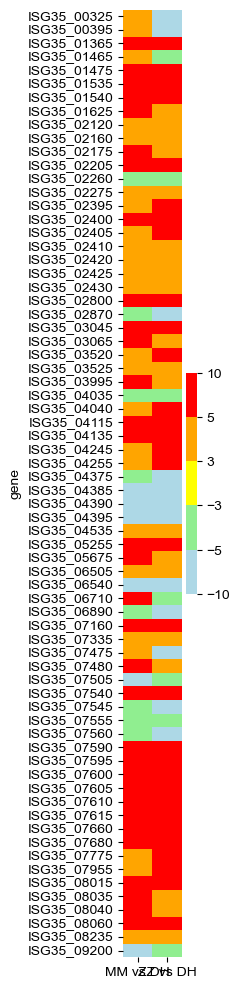

In [ ]:
## Discrete colorbar

# Set the figure size
plt.figure(figsize=(2.5, 10))  # slightly wider for readability

# Define discrete colors and levels
from matplotlib.colors import ListedColormap, BoundaryNorm

colors = ['lightblue', 'lightgreen', 'yellow', 'orange', 'red']
cmap = ListedColormap(colors)
bounds = [-10, -5, -3, 3, 5, 10] # Boundaries for each color
norm = BoundaryNorm(bounds, cmap.N)

# Plot the heatmap
ax = sns.heatmap(
    df_M_Z_vs_DH_filtered[["log2FoldChange_MvsDH", "log2FoldChange_ZvsDH"]],
    xticklabels=["MM vs DH", "ZZ vs DH"],
    yticklabels=df_M_Z_vs_DH_filtered.index,
    cmap=cmap,#"coolwarm",
    norm=norm
)

plt.tight_layout()

# Save the figure
filename = os.path.join("007_heatmap_data", "DE_Trans_discrete.svg") # to go back one directory, use ".."
print(os.path.abspath(filename))

# plt.savefig(filename, dpi=300, bbox_inches='tight') # uncomment to save the figure

plt.show()

# 6.1) Customize the plot

In [96]:
# Save the figure with a timestamp
# Need a new package
from datetime import datetime

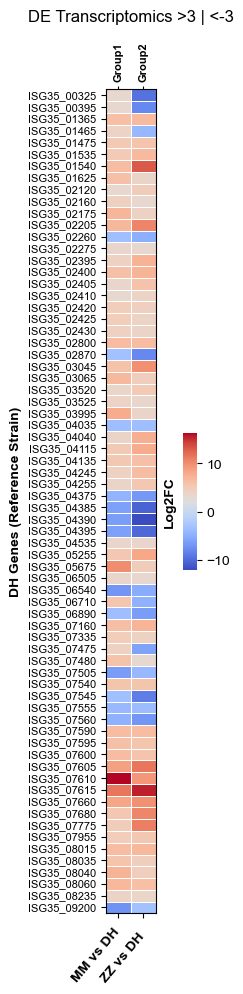

In [ ]:
# Set font scale globally
# sns.set(font_scale=0.6)

# Set the figure size
plt.figure(figsize=(2.5, 10))  # slightly wider for readability

# Plot the heatmap
ax = sns.heatmap(
    df_M_Z_vs_DH_filtered[["log2FoldChange_MvsDH", "log2FoldChange_ZvsDH"]],
    xticklabels=["MM vs DH", "ZZ vs DH"],
    yticklabels=df_M_Z_vs_DH_filtered.index,
    cmap="coolwarm",
    linewidths=0.5, # with lines between cells
	linecolor="white", # color of lines
    cbar_kws={"shrink": 0.5, "aspect": 10, "pad": 0.3} # colorbar settings
)

# Customize colorbar
cbar = ax.collections[0].colorbar
cbar.set_label("Log2FC",fontsize=10, fontweight="bold")
cbar.ax.tick_params(labelsize=10)#, length=0)  # tick font size, tick length 0 to hide ticks

# coords = (x, y) in axes fraction
cbar.ax.yaxis.label.set_rotation(90)
cbar.ax.yaxis.label.set_horizontalalignment("center")
cbar.ax.yaxis.set_label_coords(-1.4, 0.5)  # move further left

# Formatting of the labels and title
ax.set_title("DE Transcriptomics >3 | <-3", fontsize=12, pad=15)
ax.set_ylabel("DH Genes (Reference Strain)", fontsize=10,fontweight="bold")
ax.set_xlabel("")  # keep empty
ax.tick_params(axis="y", labelsize=8)#, which="both", length=0, rotation=0)  # tick label font size, tick length 0 to hide ticks

# Manually add x-axis labels with rotation and position
ax.set_xticks([0.5, 1.5])  # centers of the heatmap cells
ax.set_xticklabels([])     # hide default
# ax.text(-1.1, 76, "MM vs DH", ha="left", va="bottom", rotation=50, fontsize=10,fontweight="bold")
# ax.text(-0, 76, "ZZ vs DH", ha="left", va="bottom", rotation=50, fontsize=10,fontweight="bold")

ax.text(-0.4, 76, "MM vs DH", ha="center", va="bottom", rotation=50, fontsize=10,fontweight="bold")
ax.text(0.7, 76, "ZZ vs DH", ha="center", va="bottom", rotation=50, fontsize=10,fontweight="bold")

# Add a second x-axis on top for "Group1" and "Group2"
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())  # match heatmap
ax2.set_xticks([0.5, 1.5])  # position between the two heatmap columns
ax2.set_xticklabels(["Group1", "Group2"], fontsize=8, fontweight="bold",rotation=90)
ax2.xaxis.tick_top()  # place ticks/labels on top
ax2.tick_params(length=2)  # remove the ticks if you want

plt.tight_layout()

# Pull the timestamp (time now) in the formate that you want, YYYYmmdd_HHMMSS
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
# Save the figure
pathout = r"C:\Users\uqicasin\Documents\Teaching\Program_Workshop\ProgrammingWorkshop_Git\ProgrammingWorkshop\007_heatmap_data"
# add timestamp to the filename
filename = f"{pathout}\DE_Trans_custom_{timestamp}.svg"

# plt.savefig(filename, dpi=300, bbox_inches='tight') # uncomment to save the figure

plt.show()